# Introduction

To collect the transaction data on r/gameswap and r/gamesale.

## 0. Load the packages

In [1]:
import json
import pickle
import requests
import re
import os
import pandas as pd
import time
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime
from time import sleep
from bs4 import BeautifulSoup as bs

## 1. History of members of r/GameSale and r/GameSwap
In this section, we can see how the number of memebers in these two platforms evolves.

### 1.1 Gamesale
Use [Wayback Machine](https://archive.org/web/) to retrive the history of members on r/GameSale.

This is done in **get_gamesale_member.py**

In [11]:
with open('./data/gamesale_member.pickle', 'rb') as f:
    date_members_sale = pickle.load(f)

### 1.2 Gameswap
Use [Wayback Machine](https://archive.org/web/) to retrive the history of members on r/GameSale.

This is done in **get_gameswap_member.py**

In [2]:
with open('./data/archive_url_list_swap.pickle', 'rb') as f:
    archive_url_list = pickle.load(f)
with open('./data/archive_html_list_swap.pickle', 'rb') as f:
    archive_html_list = pickle.load(f)

In [9]:
archive_html_list = [x for _, x in sorted(zip(archive_url_list, archive_html_list))]
archive_url_list.sort()

# Get the YYYYMMDD from the archive_url_list
date = [re.findall(r'\d{8}', x)[0] for x in archive_url_list]

Due to some wierd issues of my computer, all the data disapper. The code for this can't be run normally. (get_gameswap_member.py) 

In [58]:
archive_html_list = [bs(x, 'html.parser') for x in archive_html_list]

In [ ]:
members = [228,321,410,592,824,
           1190,1885,6894,7122,7089,
           7146,7615,7925,8661,8963,
           9290,9498,10032,10071,10293,
           11814,12024,12546,12762,13047,
           13102,13257,13603,13963,14556,
           14732,14930,15064,15124,15592,
           15920,16060,16478,16680,16826,
           17047,17313,17587,17624,17076,
           17261,None,17567,17659,18001,
           18220,19282,19299,19515,19768,
           24803,25113,25863,25572,29167,
           29667,30701,30918,32071,33352,
           34374,35842,36580,37340,38396,
           39490,40222,44700,45200,46300,
           46900,47600,48200,48800,49300,
           49800,49900,51100,51200,51400,
           52000,52300,52500,53043,56763,
           57727,57896,58165,58338,58600,
           58800,59000,59156,59400,59764,
           60100,60300
          ]
members_other = []
i = len(members)

print(archive_url_list[i])
pattern = r'(\d{1,3}(?:,\d{3})*)'
archive_url_list[i]
matches = re.findall(pattern, str(archive_html_list[i]))
# matches
# matches = re.findall(pattern, '1,190')
# len3(matches)

IndexError: list index out of range

In [ ]:
i

102

In [67]:
with open("./data/output1.html", "w") as file:
    file.write(str(archive_html_list[i]))

In [85]:
def len3(matches):
    temp = []
    for x in matches:
        if len(x)>3:
            temp.append(x)
    return temp

In [3]:
# with open('./data/date_members_dict_processed.pickle', 'rb') as f:
#     date_members_swap = pickle.load(f)

### 1.3 Get the game console release date

In [12]:
from igdb.wrapper import IGDBWrapper
post_url = "https://id.twitch.tv/oauth2/token?client_id=4njc2nod9cdh7wgc575ymsij8x7pli&client_secret=2g238v7i8bk5rrch8wn3g3eg45mcgq&grant_type=client_credentials"
req = requests.post(post_url)
req_dict = req.json()

wrapper = IGDBWrapper("4njc2nod9cdh7wgc575ymsij8x7pli",req_dict.get('access_token'))

# Get all the platforms
if not os.path.exists('./data/platforms.pkl'):
    platforms = []
    while True:
        try:
            byte_array = wrapper.api_request(
                'platforms',
                'fields *;offset %d; limit 500;'%(i*500)
            )
            time.sleep(0.25)
            platform_get = json.loads(byte_array)
            if platform_get:
                platforms += platform_get
            else:
                break
        except:
            break


    # Save the platforms
    with open('./data/platforms.pkl', 'wb') as handle:
        pickle.dump(platforms, handle, protocol=pickle.HIGHEST_PROTOCOL)
else:
    with open('./data/platforms.pkl', 'rb') as handle:
        platforms = pickle.load(handle)

def get_version(version_id):
    byte_array = wrapper.api_request(
            'platform_versions',
            'fields * ; where id=%d;'%version_id
        )
    time.sleep(0.25)
    return json.loads(byte_array)[0]

def get_release_dates(platform_version_release_date_id):
    byte_array = wrapper.api_request(
        'platform_version_release_dates',
        'fields * ; where id=%d;'%platform_version_release_date_id
    )
    time.sleep(0.25)
    return json.loads(byte_array)[0]

if not os.path.exists('./data/version.pickle'):
    version_dict = {}
    for platform in platforms:
        # Get the version
        try:
            version_list = []
            for version_id in platform['versions']:
                version = get_version(version_id)
                version_list.append(version)
            version_dict[platform['name']] = version_list
            print(platform['name'])
        except:
            pass

    # Save the version
    with open('./data/version.pickle', 'wb') as handle:
        pickle.dump(version_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
else:
    with open('./data/version.pickle', 'rb') as handle:
        version_dict = pickle.load(handle)

# Choose the platform with category 1 or 5
console_dict = {}
for platform in platforms:
    try:
        if platform['category'] in [1,5]:
            console_dict[platform['name']] = version_dict[platform['name']]
    except:
        pass


Commodore CDTV
Sega Pico
PlayStation 2
iOS
Commodore Plus/4
AY-3-8710
Odyssey
Commodore PET
Sol-20
PC (Microsoft Windows)
Tapwave Zodiac
ColecoVision
Texas Instruments TI-99
Acorn Electron
Gamate
Hyper Neo Geo 64
Thomson MO5
Odyssey 2 / Videopac G7000
SteamVR
PC-50X Family
AY-3-8607
AY-3-8605
AY-3-8606
PC-98
Amstrad CPC
Playdate
Family Computer Disk System
WonderSwan Color
Neo Geo CD
Sega Game Gear
Atari Jaguar
3DO Interactive Multiplayer
Microvision
PC Engine SuperGrafx
Turbografx-16/PC Engine CD
Dreamcast
Atari 8-bit
Vectrex
Donner Model 30
PDP-8
DEC GT40
Microcomputer
Ferranti Nimrod Computer
Apple IIGS
DOS
SwanCrystal
Fairchild Channel F
PC-8801
Virtual Boy
TRS-80
Nintendo Switch
Amazon Fire TV
VC 4000
1292 Advanced Programmable Video System
Tatung Einstein
Nintendo DSi
Neo Geo Pocket
Dragon 32/64
Amstrad PCW
Xbox
PDP-11
MSX2
Atari 7800
Sega CD
Game Boy Advance
Sega 32X
AY-3-8500
AY-3-8760
AY-3-8603
Nintendo 64
Neo Geo Pocket Color
Wii U
Sharp X1
Web browser
CDC Cyber 70
OnLive Gam

In [13]:
if not os.path.exists('./data/console_date.pickle'):
    console_date_dict = {}
    for console_name, console_versions in console_dict.items():
        print(console_name)
        for version in console_versions:
            try:
                date = get_release_dates(version['platform_version_release_dates'][-1])
                console_date_dict[console_name+'-'+version['name']] = date
                print(console_name+'-'+version['name'])
            except:
                pass
    with open('./data/console_date.pickle', 'wb') as handle:
        pickle.dump(console_date_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
else:
    with open('./data/console_date.pickle', 'rb') as handle:
        console_date_dict = pickle.load(handle)

Sega Pico
PlayStation 2
PlayStation 2-Initial version
PlayStation 2-Slimline
AY-3-8710
Odyssey
Odyssey-Odyssey (US)
Odyssey-Odyssey (Export)
Odyssey-Odyssey (German Export)
Odyssey-Odisea (Mexico Export)
Odyssey-Odissea (Italian Export)
Tapwave Zodiac
Tapwave Zodiac-Zodiac 1
ColecoVision
ColecoVision-Initial version
Gamate
Gamate-Initial version
PC-50X Family
PC-50X Family-Initial version
PC-50X Family-Tele-Cassetten-Game
AY-3-8607
AY-3-8605
AY-3-8606
Playdate
Playdate-Initial version
Family Computer Disk System
Family Computer Disk System-Initial version
WonderSwan Color
Neo Geo CD
Neo Geo CD-Initial version
Sega Game Gear
Sega Game Gear-Initial version
Atari Jaguar
Atari Jaguar-Initial version
3DO Interactive Multiplayer
3DO Interactive Multiplayer-Initial version
Microvision
PC Engine SuperGrafx
Dreamcast
Dreamcast-Initial version
Vectrex
Vectrex-Vectrex
SwanCrystal
Fairchild Channel F
Fairchild Channel F-Initial version
Fairchild Channel F-Saba Videoplay
Virtual Boy
Virtual Boy-Ini

In [14]:
# Change to dataframe
df_console_date = pd.DataFrame.from_dict(console_date_dict, orient='index')
# Change the date to datetime
df_console_date['date'] = pd.to_datetime(df_console_date['date'], unit='s')
# Choose the date after 2009
df_console_date = df_console_date[df_console_date['date'] > '2009-01-01']

# Save the dataframe
df_console_date.to_csv('./data/console_date.csv')

In [16]:
df_console_date.head()

,id,category,date,human,m,region,y,checksum,updated_at
Playdate-Initial version,613,6,2021-12-31,Q4 2021,12,8,2021,090be0ee-44de-47cc-7c2a-ff7d65aec931,1.628889e+09
Nintendo Switch-Initial version,217,0,2017-03-03,"Mar 03, 2017",3,8,2017,bb40e7dd-df0e-9c22-e780-49eaf969e4b8,NaN
Nintendo Switch-Switch Lite,359,0,2019-09-20,"Sep 20, 2019",9,8,2019,7826fed6-0304-1427-cedc-2c68e6ca6137,NaN
Nintendo DSi-Initial version,267,0,2009-04-05,"Apr 05, 2009",4,2,2009,26e85793-2da5-b04a-ad7c-a40bf780ef42,NaN
Nintendo DSi-Nintendo DSi XL,271,0,2010-04-15,"Apr 15, 2010",4,3,2010,69eaa018-2827-86b3-ddf9-528e6eb5a876,NaN


### 1.4 Plot

In [17]:
game_console_interested = ['Nintendo Switch-Initial version',
                           'New Nintendo 3DS-Initial version',
                           'PlayStation 5-Initial version',
                           'PlayStation 4-Initial version',
                           'PlayStation 3-Initial version',
                           'Xbox One-Xbox One X',
                           'Xbox One-Xbox One S',
                          'Nintendo 3DS-Initial version',
                          'Nintendo DSi-Initial version',
                          'PlayStation 3-Playstation 3 Slim',
                          'PlayStation 3-Playstation 3 Super Slim']

In [18]:
# Load the console_date from csv
console_date = pd.read_csv('data/console_date.csv', index_col=0)

# Change the date to %Y%m%d
console_date['date'] = [x.replace('-', '') for x in console_date['date']]
console_date_plot = console_date[console_date.index.isin(game_console_interested)]

In [19]:
console_date_plot = console_date_plot.sort_values('date')

In [20]:
plt.figure(figsize=(20, 10))
# Plot the date and max_members
plt.plot([datetime.datetime.strptime(x[0], '%Y%m%d') for x in date_members_swap.items()], [x[1] for x in date_members_swap.items()], label='GameSwap')
plt.plot([datetime.datetime.strptime(x[0], '%Y%m%d') for x in date_members_sale.items()], [x[1] for x in date_members_sale.items()], label='GameSale')
# Mark the console date
for i in range(len(console_date_plot)):
    plt.axvline(x=datetime.datetime.strptime(console_date_plot['date'][i], '%Y%m%d'), color='r', linestyle='--')
    plt.text(datetime.datetime.strptime(console_date_plot['date'][i], '%Y%m%d')+datetime.timedelta(days=15), 5000*(i+4), console_date_plot.index[i], rotation=0)
# Set the title
plt.title('Number of members in gameswap and gamesale')
# Set the x-axis label and rotate the label
plt.xlabel('Date')
plt.xticks(rotation=45)
# Set the y-axis label
plt.ylabel('Number of members')
# Set the x-axis tick by month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=4))
# Set the legend to the upper left
plt.legend(loc='upper left')
# No grid
plt.grid(False)
# Save the figure
plt.savefig('plot/swap_sale_console_release.png')
# Show the figure
plt.show()

NameError: name 'date_members_swap' is not defined

<Figure size 2000x1000 with 0 Axes>

## 2. Get the history of the confirmed transactions

In [2]:
if not os.path.exists('./data/history.pickle'):
    history_url = "https://raw.githubusercontent.com/RegExrTech/SwapBot/master/database/gamesale-swaps.json"
    history = requests.get(history_url).json()['reddit']
    # Save the dictionary
    with open('./data/history.pickle', 'wb') as handle:
        pickle.dump(history, handle, protocol=pickle.HIGHEST_PROTOCOL)
else:
    with open('./data/history.pickle', 'rb') as handle:
        history = pickle.load(handle)

In [3]:
list(history.items())[:1]

[('mjwright412',
  ['acm1899 - https://www.reddit.com/r/gamesale/comments/4c34l2/-/d3n0hwa',
   'tearsofarapper84 - https://www.reddit.com/r/gamesale/comments/543odh/-/dbfktwo',
   'alohaanthony - https://www.reddit.com/r/mushroomkingdom/comments/f0tijf/-/foc4r1m',
   'pnguyen14 - https://www.reddit.com/r/mushroomkingdom/comments/f0tijf/-/fq3usla'])]

In [19]:
# Split by first - and return a tuple
def split_by_dash(string):
    return tuple(string.split(' - ', 1))


if not os.path.exists('./data/transformed_history.pickle'):
    # Processed data
    pattern = r"/r/(\w+)/"
    transformed_history = {}
    wrong_data = {}
    for key, value_list in history.items():
        for value in value_list:
            try:
                user, link = split_by_dash(value)
                # Use re to get the string between "r/" and "/" in the link
                try:
                    _type = re.search(pattern, link).group(1)
                except AttributeError:
                    _type = 'tbd'
                    
                transformed_history.setdefault(key, []).append({
                        'user': user,
                        'link': link,
                        'type': _type
                    })
            except ValueError:
                wrong_data.setdefault(key, []).append(value)
    with open('data/transformed_history.pickle', 'wb') as f:
        pickle.dump(transformed_history, f)
else:
    with open('data/transformed_history.pickle', 'rb') as f:
        transformed_history = pickle.load(f)

In [22]:
list(transformed_history.items())[:2]

[('mjwright412',
  [{'user': 'acm1899',
    'link': 'https://www.reddit.com/r/gamesale/comments/4c34l2/-/d3n0hwa',
    'type': 'gamesale'},
   {'user': 'tearsofarapper84',
    'link': 'https://www.reddit.com/r/gamesale/comments/543odh/-/dbfktwo',
    'type': 'gamesale'},
   {'user': 'alohaanthony',
    'link': 'https://www.reddit.com/r/mushroomkingdom/comments/f0tijf/-/foc4r1m',
    'type': 'mushroomkingdom'},
   {'user': 'pnguyen14',
    'link': 'https://www.reddit.com/r/mushroomkingdom/comments/f0tijf/-/fq3usla',
    'type': 'mushroomkingdom'}]),
 ('rdmentalist',
  [{'user': 'barbecue_wings',
    'link': 'https://www.reddit.com/r/gamesale/comments/4c34l2/-/d72rnbm',
    'type': 'gamesale'},
   {'user': 'wilbursmith22',
    'link': 'https://www.reddit.com/r/gamesale/comments/6jbqrp/-/djmhmey',
    'type': 'gamesale'},
   {'user': 'mrace2c',
    'link': 'https://www.reddit.com/r/gameswap/comments/543ojp/-/d94s4up',
    'type': 'gameswap'},
   {'user': 'crumpledpapr',
    'link': 'https

In [42]:
# This is the legacy trade.
list(wrong_data.items())[:4]

[('maverek5', ['LEGACY TRADE']),
 ('peacefulreasoning', ['LEGACY TRADE']),
 ('slytlysykotic', ['LEGACY TRADE']),
 ('manichedgehog0523', ['LEGACY TRADE'])]

### Get the concrete comment for each transaction.
Now we have the link to each confirmation of the transaction. The following code is to get the comment of each transaction.

**The following code runs too slow. See multiprocessing speeded code in get_post_multi.py which is 10 times faster than the following code.**

In [ ]:
# test = requests.get('https://redd.it/q41deg',headers = {'User-agent': '123142141'}, allow_redirects=True)

In [45]:
# test.url

'https://www.reddit.com/comments/q41deg'

In [67]:
# # Get the comment using crawler
# def get_comment(url, bot_name_to_crawl='my bot 3.1415', redirect_dict=redirect_dict):
#     # Get the redirect url already get
#     redirect_dict = redirect_dict
    
#     # Check the url if it's a short url like redd*
#     if url.startswith('redd'):
#         long_url_got = redirect_dict.get(url)
#         if long_url_got is None:
#             short_url = 'https://'+url
#             # Get the redirect long url.
#             long_url = requests.get(short_url, headers = {'User-agent': bot_name_to_crawl}, allow_redirects=True).url
#         redirect_dict[url] = long_url
#     else:
#         long_url = url

#     json_raw = requests.get(long_url+'.json', headers = {'User-agent': bot_name_to_crawl})
#     try:
#         # standard form of the comment json
#         _comment = json_raw.json()[1]['data']['children'][0]['data']
#         sleep(0.15)
#         return _comment,
#     except Exception as e:
#         return 'error'
    
# redirect_dict = {}
# error_dict = []

In [ ]:
# if not os.path.exists('./data/transformed_data.pickle'):
#     start_time = time.time()
#     i=0
#     for key, value_list in list(transformed_history.items()):
#         for value in value_list:
#             if value.get('comment') is None:
#                 try:
#                     value['comment'] = get_comment(value['link'], redirect_dict = redirect_dict)
#                 except Exception as e:
#                     # Change the bot name after a while.
#                     try:
#                         value['comment'] = get_comment(value['link'], 'my bot %d' % i, redirect_dict=redirect_dict)
#                     except Exception:
#                         error_dict.append({key:value})
#         i+=1
#         if i % 100 == 0:
#             with open('./data/transformed_data_temp.pickle', 'wb') as handle:
#                 pickle.dump(transformed_history, handle, protocol=pickle.HIGHEST_PROTOCOL)
#             print(i, time.time() - start_time)
        
#     # Save the dictionary
#     with open('./data/transformed_data.pickle', 'wb') as handle:
#         pickle.dump(transformed_history, handle, protocol=pickle.HIGHEST_PROTOCOL)
# else:
#     with open('./data/transformed_data.pickle', 'rb') as handle:
#         transformed_data = pickle.load(handle)

100 0.13472867012023926
200 0.25213074684143066
300 0.3693394660949707
400 0.4854445457458496
500 0.6024179458618164
600 0.714759349822998
700 0.8295013904571533
800 0.95168137550354
900 1.0839099884033203
1000 1.210893154144287
1100 334.840213060379
1200 685.625725030899
1300 1008.7538945674896
1400 1332.7021188735962


In [18]:
# # A sample
# for key, value_list in transformed_data.items():
#     print(key)
#     print(value_list[0].get('comment').get('body'))
#     print(value_list[0].get('comment').get('replies').get('data')['children'][0]['data'].get('body'))
#     break

mjwright412
Sold Mario Kart Double Dash to /u/mjwright412 https://www.reddit.com/r/GameSale/comments/4hdn0z/h_paypal_w_2_gamecube_controllers_mario_games/d2p7lud
Confirmed!


In [ ]:
with open('./data/transformed_data.pickle', 'rb') as handle:
    transformed_data = pickle.load(handle)
error_dict = {}
for key, value_list in transformed_history.items():
    for value in value_list:
        if value.get('comment')=='error':
            error_dict.setdefault(key,[]).append(value)
i=0
for key, value_list in error_dict.items():
    for value in value_list:
        i+=1
print(len(error_dict.items()), i)

# This needs to be rewritten.
Need to go through the reply thread to find the real reply_author.

https://www.reddit.com/r/mushroomkingdom/comments/l6narh/comment/gyh2mbn/
In this case, the reply will only get the author but not the one confirming.

In [29]:
# For each comment, we want the following information:
# - author
# - body
# - created_utc
# - permalink
# - replies['data']['children'][0]['data']
keys = ['author', 'body', 'created_utc', 'permalink']
reply_keys = ['author', 'body']

simplified_data = {}
for key, value_list in transformed_data.items():
    for value in value_list:
        print(value)
        if value.get('comment') != 'error':
            
            simplified_data.setdefault(key, []).append({k: value['comment'][k] for k in keys})
            try:
                '''
                This reply should be written using a new function.
                '''
                reply = value['comment']['replies']['data']['children'][0]['data']
                for reply_key in reply_keys:
                    if reply.get(reply_key) is not None:
                        simplified_data[key][-1].setdefault('reply_%s'%reply_key,  reply[reply_key])
            except Exception:
                pass


# flatten_dict = {}
# for key, value_list in simplified_data.items():
#     for index, value in enumerate(value_list):
#         flatten_dict.setdefault(key+"_%d" % index,value)
        
# df = pd.DataFrame(flatten_dict).T
# df.reset_index(inplace=True)

# # Transform to human-readable time
# df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')

# pattern = r"/r/(\w+)/"
# df['type'] = df['permalink'].apply(lambda x: re.search(pattern, x).group(1).lower())

# # Store the dataframe using pickle
# # df.to_pickle('./data/df.pickle')

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



TypeError: tuple indices must be integers or slices, not str

In [21]:
df.loc[:5,['author','body','reply_author','reply_body','type','created_utc']]

,author,body,reply_author,reply_body,type,created_utc
0,ACM1899,Sold Mario Kart Double Dash to /u/mjwright412 ...,mjwright412,Confirmed!,gamesale,2016-05-28 15:24:00
1,TearsOfARapper84,Successful sale of Watch Dogs 2 Gold Edition P...,mjwright412,"Confirmed. Awesome person, no hassle and would...",gamesale,2016-12-20 18:37:19
2,mjwright412,Bought an Xbox One S 500GB and 2 controllers f...,AlohaAnthony,"Yes, I can confirm. Transition went smooth. ht...",mushroomkingdom,2020-04-23 18:38:10
3,pnguyen14,Sold Person 4 Arena to u/mjwright412 for $20 s...,mjwright412,Confirmed,mushroomkingdom,2020-05-10 00:28:52
4,Barbecue_Wings,Successfull swap of Rocket League on XB1 for $...,rdmentalist,"Confirmed, thanks",gamesale,2016-08-30 16:31:14
5,wilbursmith22,Completed trade with u/rdmentalist\n\nLast Gua...,rdmentalist,"Confirmed, thanks",gamesale,2017-06-30 22:40:47


In [22]:
# Get the rows reply_author is null
check_null = df[df['reply_author'].isnull()]
check_null.head(5)[['author','body','reply_author','reply_body','type','created_utc']]

,author,body,reply_author,reply_body,type,created_utc
21,SwapNSalebot,\n**It's dangerous to go alone! Take this.**\n...,NaN,NaN,gamesale,2021-10-08 16:33:56
83,whatisrealiwonder,Traded my sonic mania for u/gaugeforever diabl...,NaN,NaN,mushroomkingdom,2020-09-29 17:48:36
97,SwapNSalebot,\n**It's dangerous to go alone! Take this.**\n...,NaN,NaN,gamesale,2021-07-26 18:29:50
98,SwapNSalebot,\n**It's dangerous to go alone! Take this.**\n...,NaN,NaN,gamesale,2021-10-15 13:26:38
99,SwapNSalebot,\n**It's dangerous to go alone! Take this.**\n...,NaN,NaN,gamesale,2021-11-06 01:45:39


### Plot the trends for the three communities.

<Figure size 640x480 with 0 Axes>

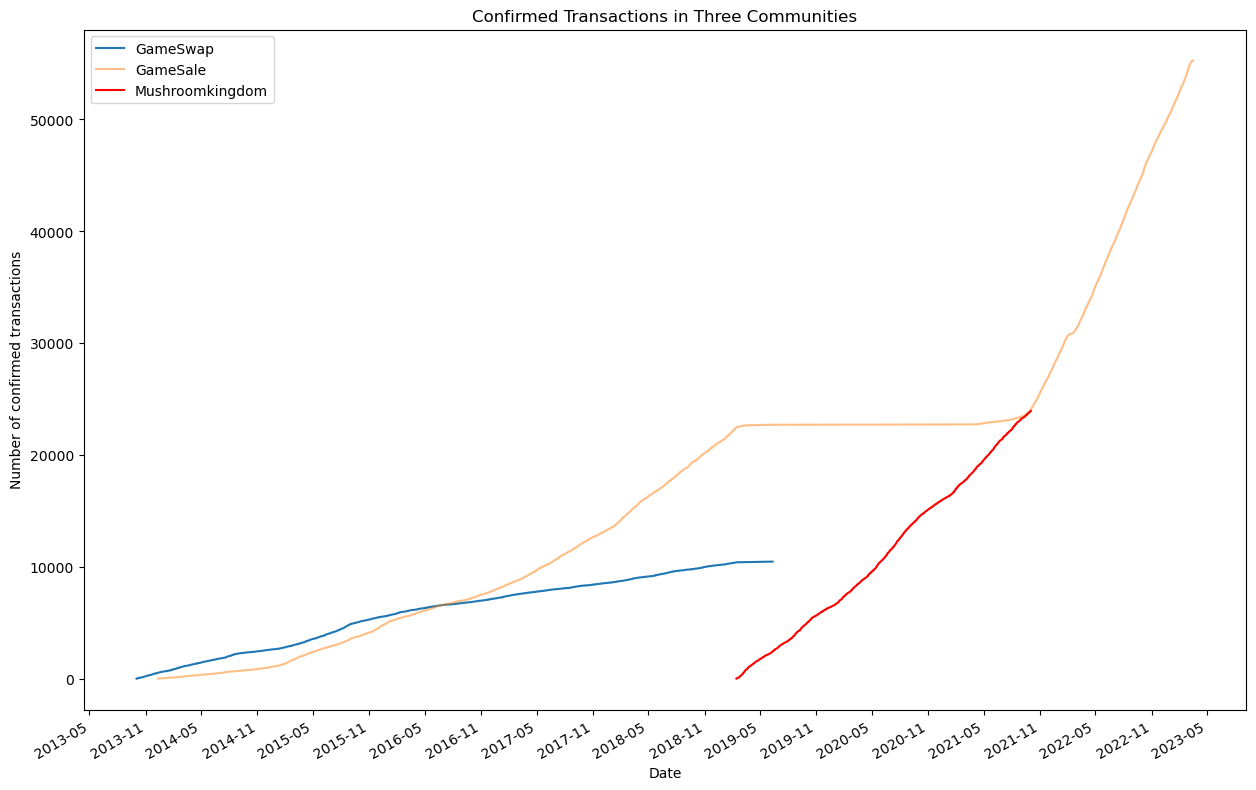

In [24]:
# Get the cumulative sum of the number of transactions per day of type 'gameswap'
plt.clf()
plt.figure(figsize=(15, 10))
df[df['type'] == 'gameswap'].groupby('created_utc').count()['index'].cumsum().plot()
df[df['type'] == 'gamesale'].groupby('created_utc').count()['index'].cumsum().plot(alpha=0.5)
df[df['type'] == 'mushroomkingdom'].groupby('created_utc').count()['index'].cumsum().plot(color='red')
plt.legend(['GameSwap', 'GameSale', 'Mushroomkingdom'])
plt.xlabel('Date')
plt.ylabel('Number of confirmed transactions')
plt.title('Confirmed Transactions in Three Communities')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.savefig('plot/confirmed_preprocess.png',dpi=300)
plt.show()


### Create training dataset using gameswap and gamesale
Mushroomkingdom is a subreddit community that is used to post confirmation for both the gameswap and gamesale communities. So we need to extract the actual type of transaction from mushroomkingdom.

In [23]:
# Training data with type not equal to 'mushroomkingdom' with columns ['body', 'type']
df_train = df[(df['type'] != 'mushroomkingdom') & (df['author']!= 'SwapNSalebot')][['body', 'type']]
# Remove the rows with body is '[deleted]' or '[removed]'
df_train = df_train[~df_train['body'].isin(['[deleted]', '[removed]'])]
# Store it in pickle
if not os.path.exists('./data/train_data.pickle'):
    with open('./data/train_data.pickle', 'wb') as handle:
        pickle.dump(df_train, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [24]:
df_train

,body,type
0,Sold Mario Kart Double Dash to /u/mjwright412 ...,gamesale
1,Successful sale of Watch Dogs 2 Gold Edition P...,gamesale
4,Successfull swap of Rocket League on XB1 for $...,gamesale
5,Completed trade with u/rdmentalist\n\nLast Gua...,gamesale
6,Successful trade with u/rdmentalist. Gave Gear...,gameswap
...,...,...
89661,Trade Completed With: u/Seeldoger47 Item(s) Tr...,gamesale
89662,Trade Completed With: u/3GSid Item(s) Traded: ...,gamesale
89663,Successful transaction with /u/sam_plus_plus\n...,gamesale
89664,My The Last Guardian brand new for /u/Moonstac...,gamesale
